In [33]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import os
import matplotlib.pyplot as plt
import math as m

In [233]:
# Create an ExcelFile object
file = pd.ExcelFile('A549_A16 treatment_660126.xlsx')
sheet_names = file.sheet_names
print(sheet_names)

['Area - ions', 'Area - peptides', 'Area - proteins', 'MLR normalization', 't-test', 'sig.', 'Score', 'FDR', 'Observed RT']


In [234]:
os.chdir(r'E:\Proteomics_analysis')
df = pd.read_excel("A549_A16 treatment_660126.xlsx", sheet_name='t-test')

In [235]:
#df = df.fillna(0)

In [236]:
df.to_csv("A549_A16 treatment_660126_t-test.csv", index = None, header =True)
df = pd.read_csv("A549_A16 treatment_660126_t-test.csv")

In [237]:
df.head(1)

,Peak Name,m/z,Ret. Time,Group,Use,t-value,p-value,Log (p),Mean 1,Mean 2,Median 1,Median 2,Sigma 1,Sigma 2,Delta,Fold Change,Log (Fold Change)
0,sp|P23284|PPIB_HUMAN,NaN,NaN,Peptidyl-prolyl cis-trans isomerase B OS=Homo ...,True,27.595672,0.00001,-4.982059,114063.030113,5440.307229,116040.817729,6737.091935,4717.824953,4921.756404,108622.722885,20.9662846821696,1.32152147839156


In [238]:
df.shape

(739, 17)

In [239]:
df1 = df[pd.to_numeric(df['Fold Change'], errors='coerce').notnull()]

In [240]:
df1.shape

(690, 17)

In [241]:
#df1.to_csv("test.csv", index = None, header =True)

In [242]:
#df1 = df[df['Fold Change'] != 0]
df1 = df1.copy()
df1['Fold Change'] = pd.to_numeric(df1['Fold Change'])
df1['log2(fold change)'] = df1['Fold Change'].apply(np.log2)
df1['"-log10(p-value)"'] = -1 * df1['p-value'].apply(np.log10)

In [243]:
df1.head(1)

,Peak Name,m/z,Ret. Time,Group,Use,t-value,p-value,Log (p),Mean 1,Mean 2,Median 1,Median 2,Sigma 1,Sigma 2,Delta,Fold Change,Log (Fold Change),log2(fold change),"""-log10(p-value)"""
0,sp|P23284|PPIB_HUMAN,NaN,NaN,Peptidyl-prolyl cis-trans isomerase B OS=Homo ...,True,27.595672,0.00001,-4.982059,114063.030113,5440.307229,116040.817729,6737.091935,4717.824953,4921.756404,108622.722885,20.966285,1.32152147839156,4.389999,4.982059


In [244]:
df1['Protein'] = df1['Peak Name'].str.split('|').str[2].str.split('_').str[0]

In [245]:
df1.head(1)

,Peak Name,m/z,Ret. Time,Group,Use,t-value,p-value,Log (p),Mean 1,Mean 2,Median 1,Median 2,Sigma 1,Sigma 2,Delta,Fold Change,Log (Fold Change),log2(fold change),"""-log10(p-value)""",Protein
0,sp|P23284|PPIB_HUMAN,NaN,NaN,Peptidyl-prolyl cis-trans isomerase B OS=Homo ...,True,27.595672,0.00001,-4.982059,114063.030113,5440.307229,116040.817729,6737.091935,4717.824953,4921.756404,108622.722885,20.966285,1.32152147839156,4.389999,4.982059,PPIB


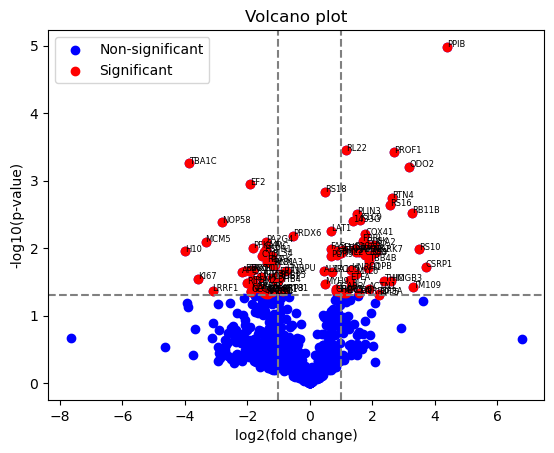

In [246]:
# calculate log2(fold change) and -log10(p-value)
#df1['log2(fold change)']
#df1['"-log10(p-value)"'] = -1 * df1['p-value'].apply(np.log10)
#df1['"-log10(p-value)"']

# filter rows where p-value is less than 0.05
significant_peaks = df1[df1['p-value'] < 0.05]

# set up plot
fig, ax = plt.subplots()
ax.scatter(df1['log2(fold change)'], df1['"-log10(p-value)"'], color='blue', label='Non-significant')
ax.scatter(significant_peaks['log2(fold change)'], significant_peaks['"-log10(p-value)"'], color='red', label='Significant')
ax.axhline(y=-np.log10(0.05), color='gray', linestyle='--')
ax.axvline(x=1, color='gray', linestyle='--')
ax.axvline(x=-1, color='gray', linestyle='--')
ax.set_xlabel('log2(fold change)')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Volcano plot')
ax.legend()

# add text labels for significant peaks
for idx, row in significant_peaks.iterrows():
    ax.text(row['log2(fold change)'], row['"-log10(p-value)"'], row['Protein'], fontsize=6)

# show plot
#plt.show()
plt.savefig('volcano_plot.png', dpi=300, bbox_inches='tight')

In [247]:
# count number of significant peaks
num_significant_peaks = len(significant_peaks)

print(f"Number of significant peaks: {num_significant_peaks}")

Number of significant peaks: 94


In [248]:
df1_sp = df1[df1['p-value'] < 0.05].sort_values(by=['p-value'], ascending=True)
df1_sp.to_csv('significant_peaks_remove_zero.csv', index=False, header=True)

In [249]:
df_sp = df[df['p-value'] < 0.05].sort_values(by=['p-value'], ascending=True)
df_sp.to_csv('significant_peaks.csv', index=False, header=True)

In [296]:
os.chdir(r'E:\Proteomics_analysis')
df_MLR = pd.read_excel("A549_A16 treatment_660126.xlsx", sheet_name='MLR normalization')

In [297]:
df_MLR.to_csv("A549_A16 treatment_660126_MLR.csv", index = None, header =True)
df_MLR = pd.read_csv("A549_A16 treatment_660126_MLR.csv")

In [298]:
df_MLR.head(5)

,Sample Name,A549_A16treatment_SWATH_1,A549_A16treatment_SWATH_2,A549_A16treatment_SWATH_3,A549_nontreatment_SWATH_3,A549_nontreatment_SWATH_1,A549_nontreatment_SWATH_2
0,Sample ID,NaN,NaN,NaN,NaN,NaN,NaN
1,Group,NaN,NaN,NaN,NaN,NaN,NaN
2,sp|Q15149|PLEC_HUMAN_group_Plectin OS=Homo sap...,255590.0,361330.0,300570.0,961250.0,1282500.0,187090.0
3,sp|Q09666|AHNK_HUMAN_group_Neuroblast differen...,254440.0,304190.0,274570.0,736800.0,834440.0,384830.0
4,sp|P21333|FLNA_HUMAN_group_Filamin-A OS=Homo s...,1123000.0,959120.0,1063100.0,1069100.0,1179800.0,898420.0


In [302]:
df_MLR = df_MLR.dropna(subset=[df_MLR.columns[1]])

In [303]:
df_MLR.head(4)

,Sample Name,A549_A16treatment_SWATH_1,A549_A16treatment_SWATH_2,A549_A16treatment_SWATH_3,A549_nontreatment_SWATH_3,A549_nontreatment_SWATH_1,A549_nontreatment_SWATH_2
2,sp|Q15149|PLEC_HUMAN_group_Plectin OS=Homo sap...,255590.0,361330.0,300570.0,961250.0,1282500.0,187090.0
3,sp|Q09666|AHNK_HUMAN_group_Neuroblast differen...,254440.0,304190.0,274570.0,736800.0,834440.0,384830.0
4,sp|P21333|FLNA_HUMAN_group_Filamin-A OS=Homo s...,1123000.0,959120.0,1063100.0,1069100.0,1179800.0,898420.0
5,sp|P35579|MYH9_HUMAN_group_Myosin-9 OS=Homo sa...,487560.0,407750.0,391030.0,269380.0,352830.0,285860.0


In [304]:
df_MLR['A16treatment_mean'] = df_MLR[['A549_A16treatment_SWATH_1', 'A549_A16treatment_SWATH_2', 'A549_A16treatment_SWATH_3']].mean(axis=1)
df_MLR['nontreatment_mean'] = df_MLR[['A549_nontreatment_SWATH_1', 'A549_nontreatment_SWATH_2', 'A549_nontreatment_SWATH_3']].mean(axis=1)

In [305]:
from scipy.stats import ttest_ind
df_MLR['t_test'], df_MLR['p_value'] = ttest_ind(df_MLR[['A549_A16treatment_SWATH_1', 'A549_A16treatment_SWATH_2', 'A549_A16treatment_SWATH_3']], df_MLR[['A549_nontreatment_SWATH_1', 'A549_nontreatment_SWATH_2', 'A549_nontreatment_SWATH_3']], axis=1)

In [306]:
df_MLR.head(4)

,Sample Name,A549_A16treatment_SWATH_1,A549_A16treatment_SWATH_2,A549_A16treatment_SWATH_3,A549_nontreatment_SWATH_3,A549_nontreatment_SWATH_1,A549_nontreatment_SWATH_2,A16treatment_mean,nontreatment_mean,t_test,p_value
2,sp|Q15149|PLEC_HUMAN_group_Plectin OS=Homo sap...,255590.0,361330.0,300570.0,961250.0,1282500.0,187090.0,3.058300e+05,8.102800e+05,-1.544820,0.197277
3,sp|Q09666|AHNK_HUMAN_group_Neuroblast differen...,254440.0,304190.0,274570.0,736800.0,834440.0,384830.0,2.777333e+05,6.520233e+05,-2.726074,0.052656
4,sp|P21333|FLNA_HUMAN_group_Filamin-A OS=Homo s...,1123000.0,959120.0,1063100.0,1069100.0,1179800.0,898420.0,1.048407e+06,1.049107e+06,-0.007383,0.994463
5,sp|P35579|MYH9_HUMAN_group_Myosin-9 OS=Homo sa...,487560.0,407750.0,391030.0,269380.0,352830.0,285860.0,4.287800e+05,3.026900e+05,3.214944,0.032436


In [307]:
df_MLR.shape

(739, 11)

In [308]:
df_MLRrm = df_MLR[df_MLR['nontreatment_mean'] != 0]

In [309]:
df_MLRrm.shape

(690, 11)

In [310]:
df_MLRrm = df_MLRrm.copy()
df_MLRrm['FC_ACP/contrl'] = df_MLRrm['A16treatment_mean']/df_MLR['nontreatment_mean']
df_MLRrm['log2(FC_ACP/contrl)'] = df_MLRrm['FC_ACP/contrl'].apply(np.log2)
df_MLRrm['"-log10(p_value)"'] = -1 * df_MLRrm['p_value'].apply(np.log10)
df_MLRrm['Protein'] = df_MLRrm['Sample Name'].str.split('|').str[2].str.split('_').str[0]

In [311]:
df_MLRrm.head(4)

,Sample Name,A549_A16treatment_SWATH_1,A549_A16treatment_SWATH_2,A549_A16treatment_SWATH_3,A549_nontreatment_SWATH_3,A549_nontreatment_SWATH_1,A549_nontreatment_SWATH_2,A16treatment_mean,nontreatment_mean,t_test,p_value,FC_ACP/contrl,log2(FC_ACP/contrl),"""-log10(p_value)""",Protein
2,sp|Q15149|PLEC_HUMAN_group_Plectin OS=Homo sap...,255590.0,361330.0,300570.0,961250.0,1282500.0,187090.0,3.058300e+05,8.102800e+05,-1.544820,0.197277,0.377437,-1.405691,0.704924,PLEC
3,sp|Q09666|AHNK_HUMAN_group_Neuroblast differen...,254440.0,304190.0,274570.0,736800.0,834440.0,384830.0,2.777333e+05,6.520233e+05,-2.726074,0.052656,0.425956,-1.231223,1.278554,AHNK
4,sp|P21333|FLNA_HUMAN_group_Filamin-A OS=Homo s...,1123000.0,959120.0,1063100.0,1069100.0,1179800.0,898420.0,1.048407e+06,1.049107e+06,-0.007383,0.994463,0.999333,-0.000963,0.002411,FLNA
5,sp|P35579|MYH9_HUMAN_group_Myosin-9 OS=Homo sa...,487560.0,407750.0,391030.0,269380.0,352830.0,285860.0,4.287800e+05,3.026900e+05,3.214944,0.032436,1.416565,0.502397,1.488972,MYH9


In [312]:
df_MLRrm.columns

Index(['Sample Name', 'A549_A16treatment_SWATH_1', 'A549_A16treatment_SWATH_2',
       'A549_A16treatment_SWATH_3', 'A549_nontreatment_SWATH_3',
       'A549_nontreatment_SWATH_1', 'A549_nontreatment_SWATH_2',
       'A16treatment_mean', 'nontreatment_mean', 't_test', 'p_value',
       'FC_ACP/contrl', 'log2(FC_ACP/contrl)', '"-log10(p_value)"', 'Protein'],
      dtype='object')

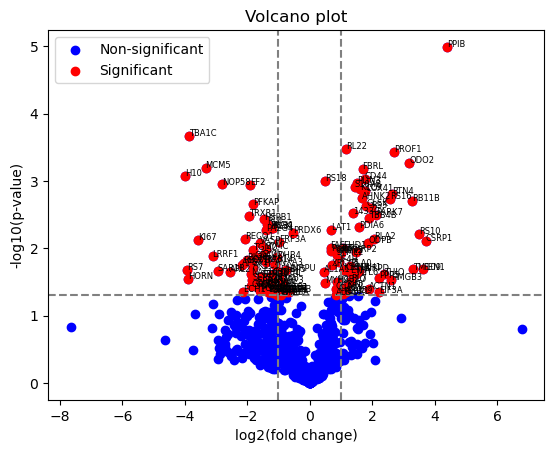

In [315]:
significant_peaks = df_MLRrm[df_MLRrm['p_value'] < 0.05]

# set up plot
fig, ax = plt.subplots()
ax.scatter(df_MLRrm['log2(FC_ACP/contrl)'], df_MLRrm['"-log10(p_value)"'], color='blue', label='Non-significant')
ax.scatter(significant_peaks['log2(FC_ACP/contrl)'], significant_peaks['"-log10(p_value)"'], color='red', label='Significant')
ax.axhline(y=-np.log10(0.05), color='gray', linestyle='--')
ax.axvline(x=1, color='gray', linestyle='--')
ax.axvline(x=-1, color='gray', linestyle='--')
ax.set_xlabel('log2(fold change)')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Volcano plot')
ax.legend()

# add text labels for significant peaks
for idx, row in significant_peaks.iterrows():
    ax.text(row['log2(FC_ACP/contrl)'], row['"-log10(p_value)"'], row['Protein'], fontsize=6)

# show plot
#plt.show()
plt.savefig('volcano_plot_manual.png', dpi=300, bbox_inches='tight')

In [317]:
df_MLRrm_sp = df_MLRrm[df_MLRrm['p_value'] < 0.05].sort_values(by=['p_value'], ascending=True)
df_MLRrm_sp.to_csv('significant_peaks_remove_zero_MLR.csv', index=False, header=True)

In [320]:
df_MLR_sp = df_MLR[df_MLR['p_value'] < 0.05].sort_values(by=['p_value'], ascending=True)
df_MLR_sp.to_csv('significant_peaks_MLR.csv', index=False, header=True)

In [205]:
# Separate the A16treatment group and nontreatment group
df_a16 = df_MLR[['A549_A16treatment_SWATH_1', 'A549_A16treatment_SWATH_2', 'A549_A16treatment_SWATH_3']]
df_non = df_MLR[['A549_nontreatment_SWATH_3', 'A549_nontreatment_SWATH_1', 'A549_nontreatment_SWATH_2']]

# Calculate the mean of each group
mean_a16 = df_a16.mean(axis=1)
mean_non = df_non.mean(axis=1)

In [ ]:
# Perform a t-test
t_stat, p_val = ttest_ind(mean_a16, mean_non)

In [85]:
log2 = m.log2(20.9662846821696)
log10 = m.log10(20.9662846821696)
print(log2,log10)
#math.log1p(x)

4.389999327066015 1.321521478391563


In [15]:
#Calculate every row with certain column
df['mean_A16'] = df.iloc[:, 1:3].mean(axis=1)
df['mean_NT'] = df.iloc[:, 4:6].mean(axis=1)

In [16]:
df.head(3)

,Protein,A549_A16treatment_SWATH_1 (A549_A16treatment_SWATH_100.wiff (sample 1)),A549_A16treatment_SWATH_2 (A549_A16treatment_SWATH_200.wiff (sample 1)),A549_A16treatment_SWATH_3 (A549_A16treatment_SWATH_300.wiff (sample 1)),A549_nontreatment_SWATH_3 (A549_nontreatment_SWATH_30.wiff (sample 1)),A549_nontreatment_SWATH_1 (A549_nontreatment_SWATH_100.wiff (sample 1)),A549_nontreatment_SWATH_2 (A549_nontreatment_SWATH_200.wiff (sample 1)),mean_A16,mean_NT
0,sp|Q15149|PLEC_HUMAN,2.323898e+05,361332.342184,246806.402719,57872.629947,55999.814567,11521.056227,296861.085602,56936.222257
1,sp|Q09666|AHNK_HUMAN,2.313437e+05,304193.835836,225455.473828,44359.455238,36434.229211,23697.546591,267768.762797,40396.842224
2,sp|P21333|FLNA_HUMAN,1.021063e+06,959118.862713,872954.046260,64366.945632,51512.239307,55324.594545,990090.736936,57939.592469
